# Rectangles

You are given three rectangles whose sides are aligned with the horizontal and vertical axes. Your task is to compute the total area covered by the rectangles. Overlapping regions are counted only once.

For example, in the following figure the area covered by the rectangles is 16. The figure corresponds to the example in the code template.

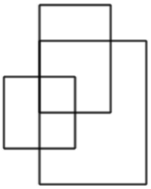

You may assume that all the coordinates are integers in the range $-10^9 \dots 10^9$.

Notice that going through all possible 1x1 rectangles one by one is too slow. You have to find a more efficient way to calculate the area.

Implement a function `area(rec1, rec2, rec3)` that returns the total area covered. The function is given three tuples, each defining one rectangle. Each tuple contains four integers $x_1$, $y_1$, $x_2$ and $y_2$: The top left corner is $(x_1,y_1)$ and the bottom right corner is $(x_2,y_2)$.

Implement the function in a file `rectangles.py`.

In [ ]:
def area(rec1, rec2, rec3):
    # TODO

if __name__ == "__main__":
    rec1 = (-1,1,1,-1) # area of rec1 = abs((1 - -1)*(-1 - 1)) = 4 
    rec2 = (0,3,2,0) # area of rec2 = abs((2 - 0)*(0 - 3)) = 6
    rec3 = (0,2,3,-2) # area of rec3 = abs((3 - 0)*(-2 - 2)) = 12
    print(area(rec1,rec2,rec3)) # 16

### Attempt 1

In [19]:
def area(rec1, rec2, rec3):
    rects = [rec1, rec2, rec3]

    def compute_area(rec):
        # Unpack the rectangle coordinates
        x1, y1, x2, y2 = rec
        # Calculate the area of the rectangle
        return abs(x2 - x1) * abs(y1 - y2)
    
    def overlap_area(rec1, rec2):
        # Unpack the coordinates of both rectangles
        x1, y1, x2, y2 = rec1
        x3, y3, x4, y4 = rec2
        # Calculate the width and height of the overlap
        overlap_width = max(0, min(x2, x4) - max(x1, x3))
        overlap_height = max(0, min(y1, y3) - max(y2, y4))
        # Return the area of the overlap
        return overlap_width * overlap_height
    
    # Calculate individual areas
    total = sum(compute_area(rec) for rec in rects)
    
    # Calculate overlapping areas between each pair of rectangles
    pairwise = sum(overlap_area(rects[i], rects[j]) for i in range(len(rects)) for j in range(i+1, len(rects)))
    
    # Calculate the area where all three rectangles overlap
    x1, x2, x3, x4, x5, x6 = rects[0][0], rects[0][2], rects[1][0], rects[1][2], rects[2][0], rects[2][2]
    y1, y2, y3, y4, y5, y6 = rects[0][1], rects[0][3], rects[1][1], rects[1][3], rects[2][1], rects[2][3]
    overlap_width = max(0, min(x2, x4, x6) - max(x1, x3, x5))
    overlap_height = max(0, min(y1, y3, y5) - max(y2, y4, y6))
    all_overlap = overlap_width * overlap_height
    
    # Subtract overlapping areas and add back non-overlapping areas
    area = total - pairwise + all_overlap
    
    return area

# Example usage
if __name__ == "__main__":
    rec1 = (-1, 1, 1, -1)
    rec2 = (0, 3, 2, 0)
    rec3 = (0, 2, 3, -2)
    print(area(rec1, rec2, rec3))  # Expected Output: 16
    
    rec1 = (8, 10, 14, 4)
    rec2 = (3, 7, 9, 3)
    rec3 = (5, 8, 10, 3)
    print(area(rec1, rec2, rec3))  # Expected Output: 61
    
    rec1 = (37904748,847088754,800763268,371024299)
    rec2 = (-516071731,-515113038,597607792,-681585739)
    rec3 = (22452616,638287530,729050355,350766166)
    print(area(rec1, rec2, rec3)) # Expected Output: 567011201506428002


16
61
567011201506428002


The points below highlight all the top left and bottom right coordinates in the example:

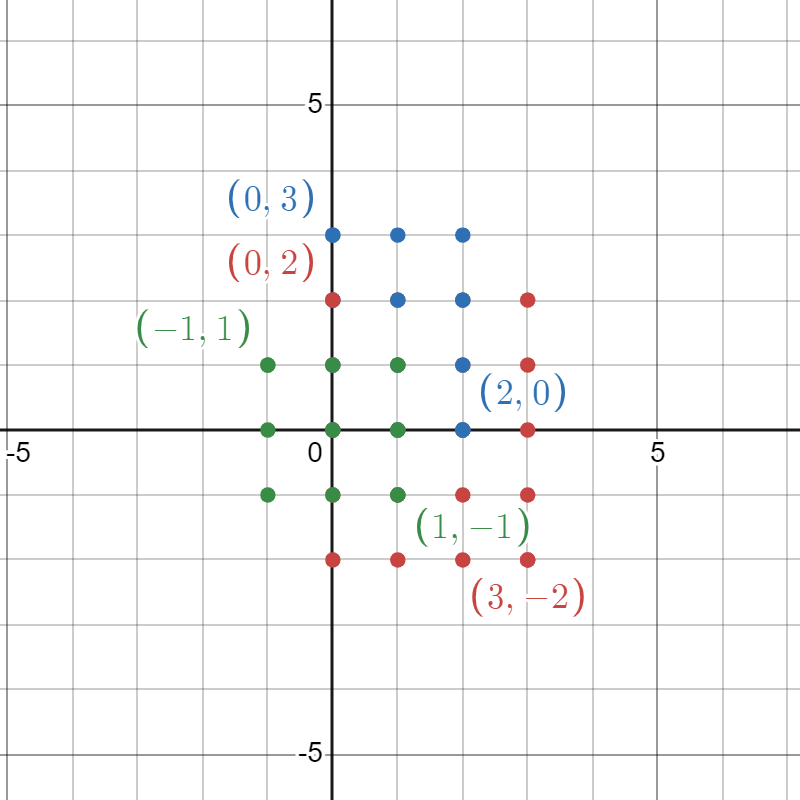

For the first pairwise rectangle we compute the overlap by finding the minimum of the x2 coordinate between both the rectangles and subtract the maximum of the x1 coordinate (if there are no overlaps and the subtraction leads to a negative number, 0 is taken) (x2 > x1)

Similarly, we compute the minimum of the y1 coordinate between both the rectangles and subtract the maximum of the x2 coordinate (y1 > y2) (if there are no overlaps and the subtraction leads to a negative number, 0 is taken)

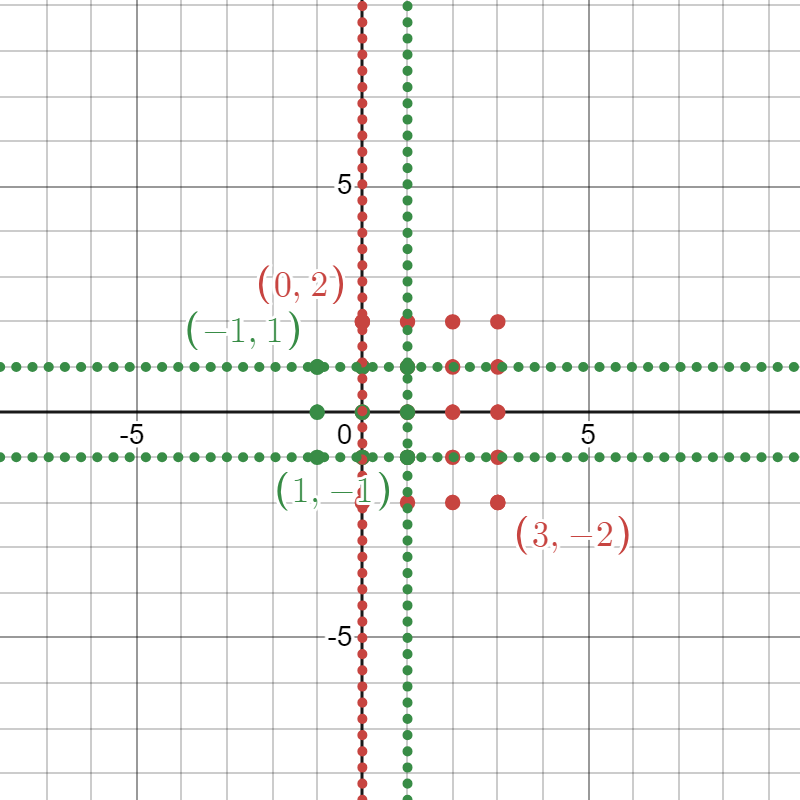

Similar to the first rectangle, for the second pairwise rectangle we compute the overlap by finding the minimum of the x2 coordinate between both the rectangles and subtract the maximum of the x1 coordinate (if there are no overlaps and the subtraction leads to a negative number, 0 is taken) (x2 > x1)

Similarly, we compute the minimum of the y1 coordinate between both the rectangles and subtract the maximum of the x2 coordinate (y1 > y2) (if there are no overlaps and the subtraction leads to a negative number, 0 is taken)

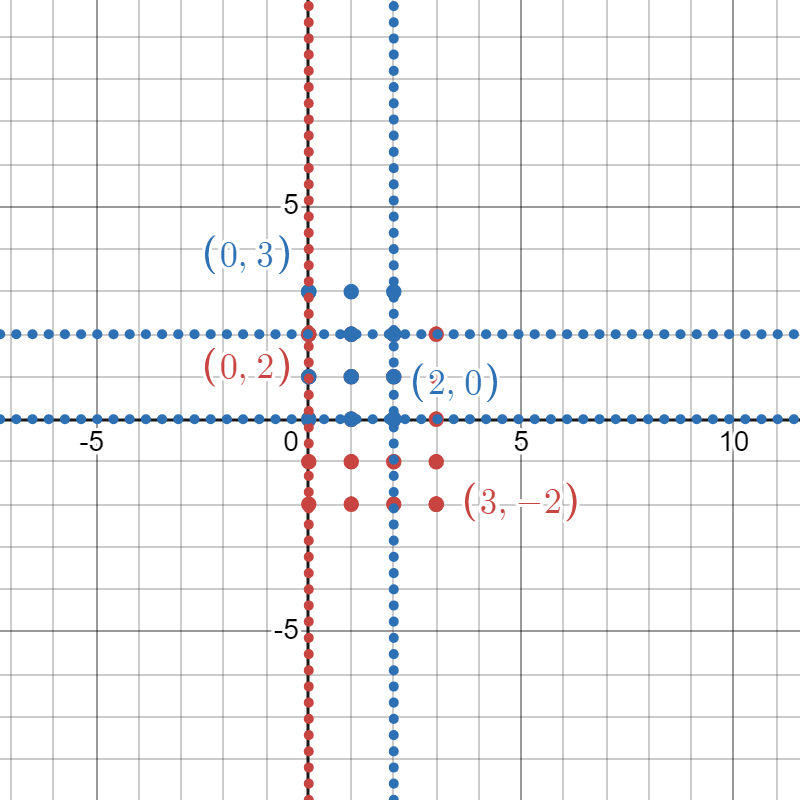

A similar computation is taken for the rectangles (0, 3),(2, 0) and (-1, 1),(1, -1)

The combined overlap between all rectangle is computed in a similar fashion as pairwaise overlap. We take the minimum of the x2 from all three rectangles and the maximum of the x1 from all three triangles to obtain the width of the rectangle. Then we take the minimum of the y1 from all three rectangles and maximum of the y2 from all rectangles to obtain the height.If no overlaps are obtainsd, the result is simply zero.

Because the pairwise overlap is netted out of the total area of all rectangles, the complete overlap needs to be added back due to double omission.

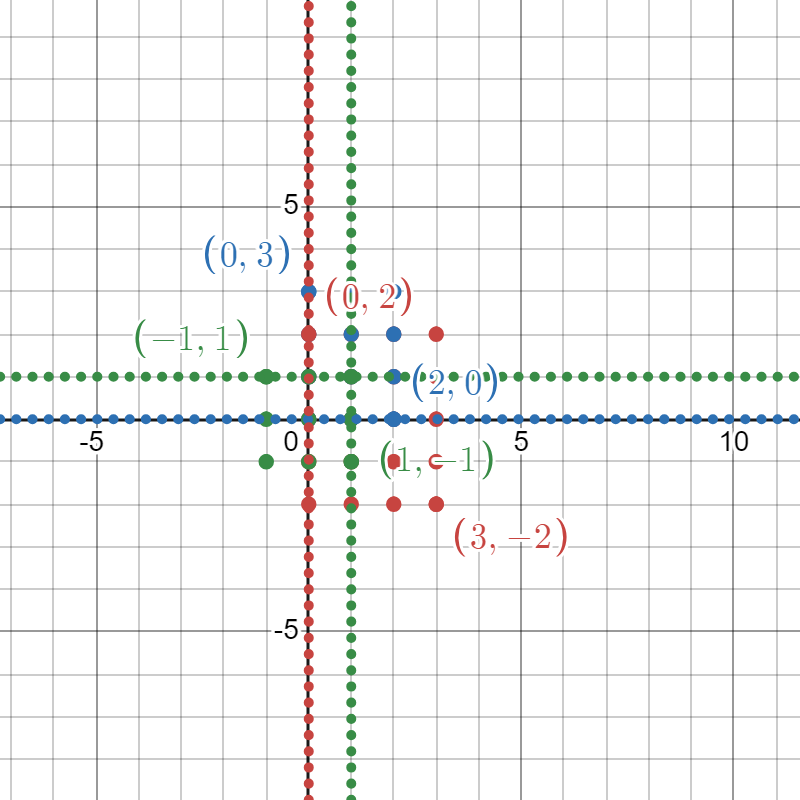

### Attempt 2

In [32]:
def area(rec1, rec2, rec3):
    # Extract the coordinates for each rectangle
    recs = [rec1, rec2, rec3]
    
    # Create a set of coordinates for each rectangle - ensuring that x2 and y2 are not included in range
    # This code block has 3 iterations: 1) loops through the recs list unpacking the corner coordinates,
    # 2) iterates through the range of x coordinates from x1 to x2 (x1 < x2)
    # 3) iterates through the range of y coordinates from y2 to y1 (y2 < y1)
    # The coordinates from all rectangles are combined and stored inside a set thus only unique coordinates are retained
    coords_rec = set((x, y) for x1, y1, x2, y2 in recs for x in range(x1, x2) for y in range(y2, y1))

    # Computes the length of the set to infer the area of the overlapping rectangles
    return len(coords_rec)

if __name__ == "__main__":
    rec1 = (-1, 1, 1, -1)
    rec2 = (0, 3, 2, 0)
    rec3 = (0, 2, 3, -2)
    print(area(rec1, rec2, rec3))  # Output: 16
    
    rec1 = (8, 10, 14, 4)
    rec2 = (3, 7, 9, 3)
    rec3 = (5, 8, 10, 3)
    print(area(rec1, rec2, rec3))  # Output: 61

16
61


The main logic behind this approach is to generate an exhaustive set of coordinates covered by each rectangle and combining these sets using set union, thus removing any overlaps. At the end, a simple count of all the remaining coordinates in the set infers the total area occupied by the overlapping rectangles.

There are one important features here:
1) The range function does not include the very last x2 and y2 values in order to ensure that we are not simply counting the remaining coordinates but counting only those necessary to form unit squares.

Here are all the coordinates that are formed by the three example rectangles combined.
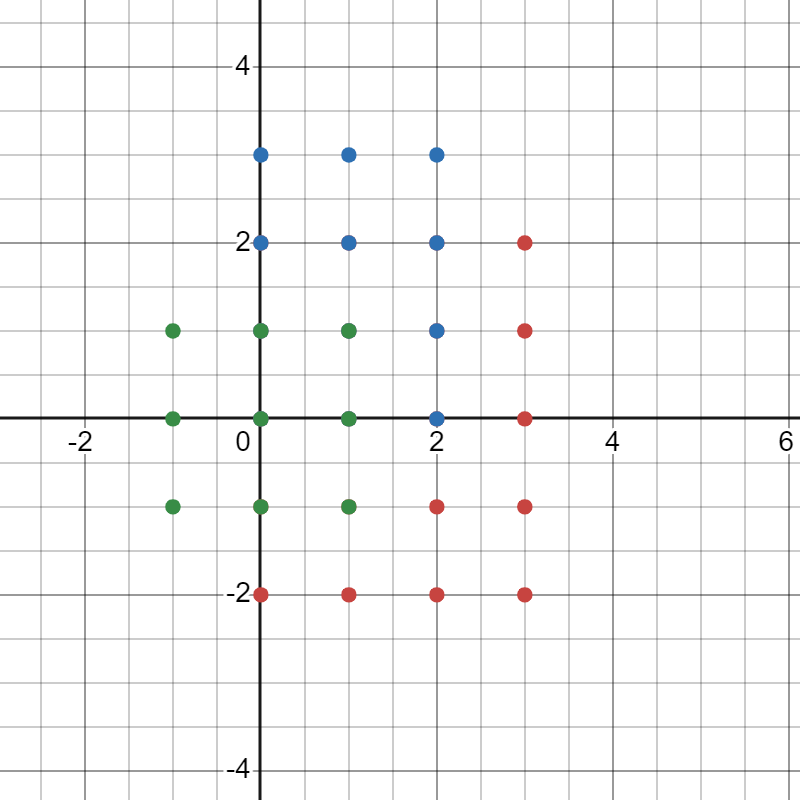

However, we cannot simply count all the unique coordinates as these are not an indication of unit squares or area occupied by the combined rectangles. 

We need to exclude the x2 and y2 in the range function (not included in upper bounds) and obtain coordinates as such:
(Only the black dots are counted and thus imply the underlying unit squares/area.)

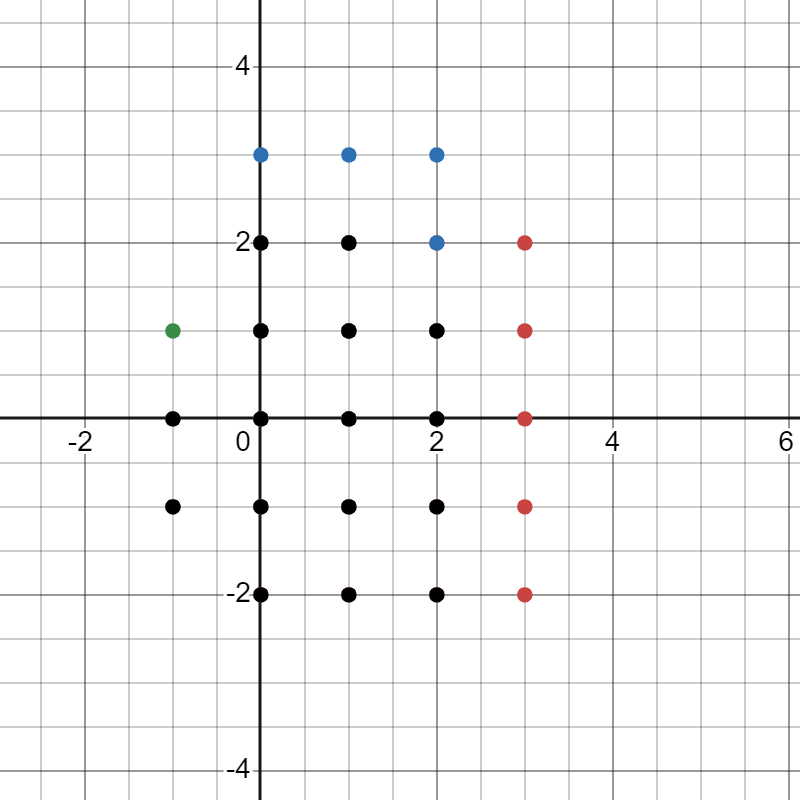

In [34]:
def area(rec1, rec2, rec3):
    recs = [rec1, rec2, rec3]
    coords_rec = set((x, y) for x1, y1, x2, y2 in recs for x in range(x1, x2) for y in range(y2, y1))
    return len(coords_rec)

if __name__ == "__main__":
    rec1 = (-1, 1, 1, -1)
    rec2 = (0, 3, 2, 0)
    rec3 = (0, 2, 3, -2)
    print(area(rec1, rec2, rec3))  # Output: 16
    
    rec1 = (8, 10, 14, 4)
    rec2 = (3, 7, 9, 3)
    rec3 = (5, 8, 10, 3)
    print(area(rec1, rec2, rec3))  # Output: 61
    
    # Below test produces a MemoryError:
    rec1 = (37904748,847088754,800763268,371024299)
    rec2 = (-516071731,-515113038,597607792,-681585739)
    rec3 = (22452616,638287530,729050355,350766166)
    print(area(rec1, rec2, rec3))

16
61


### Attempt 3 - Using Lambdas

In [1]:
def area(rec1, rec2, rec3):
    l = [rec1, rec2, rec3]
    f = lambda l:len({(x,y)for x1, y1, x2, y2 in l for x in range(x1, x2)for y in range(y2, y1)})
    s = f(l)
    return s

if __name__ == "__main__":
    rec1 = (-1,1,1,-1) # area of rec1 = abs((1 - -1)*(-1 - 1)) = 4 
    rec2 = (0,3,2,0) # area of rec2 = abs((2 - 0)*(0 - 3)) = 6
    rec3 = (0,2,3,-2) # area of rec3 = abs((3 - 0)*(-2 - 2)) = 12
    print(area(rec1,rec2,rec3)) # 16
    
    rec1 = (37904748,847088754,800763268,371024299)
    rec2 = (-516071731,-515113038,597607792,-681585739)
    rec3 = (22452616,638287530,729050355,350766166)
    print(area(rec1, rec2, rec3))

16


#### Reference/Inspiration Code

In [33]:
# *a unpacks as x1 and x2, in order
# b and c represent y2 and y1, in order
f = lambda l:len({(x,y) for *a,b,c in l for x in range(*a)for y in range(b,c)})

tests = ([((-1,1),(1,-1)),((0,3),(2,0)), ((0,2),(3,-2))],[((3,7),(9,3))], [((8,10),(14,4))], [((3,7),(9,3)),((8,10),(14,4))], [((8,10),(14,4)),((3,7),(9,3)),((5,8),(10,3))], [((1,8),(8,1)),((2,3),(3,5))])
expected = (16, 24, 36, 57, 61, 49)
checker = ('\u274c', '\u2713')
for t,e in zip(tests, expected):
    # creates a list in such a way that each rectangle coordinate tuple is reorganized from ((x1, y1), (x2, y2)) to -> (x1, x2, y2, y1)
    l=[(a,c,d,b)for(a,b),(c,d)in t]
    s = f(l)
    print(f'{t} -> {s} {checker[e==s]}')

[((-1, 1), (1, -1)), ((0, 3), (2, 0)), ((0, 2), (3, -2))] -> 16 ✓
[((3, 7), (9, 3))] -> 24 ✓
[((8, 10), (14, 4))] -> 36 ✓
[((3, 7), (9, 3)), ((8, 10), (14, 4))] -> 57 ✓
[((8, 10), (14, 4)), ((3, 7), (9, 3)), ((5, 8), (10, 3))] -> 61 ✓
[((1, 8), (8, 1)), ((2, 3), (3, 5))] -> 49 ✓


### Solution

In [20]:
def area_of(rec):
    width = rec[2]-rec[0]
    height = rec[1]-rec[3]
    return width*height if width > 0 and height > 0 else 0

def intersection(rec1, rec2):
    return (max(rec1[0],rec2[0]),
            min(rec1[1],rec2[1]),
            min(rec1[2],rec2[2]),
            max(rec1[3],rec2[3]))

def area(rec1, rec2, rec3):
    result = area_of(rec1) + area_of(rec2) + area_of(rec3)
    result -= area_of(intersection(rec1,rec2))
    result -= area_of(intersection(rec1,rec3))
    result -= area_of(intersection(rec2,rec3))
    result += area_of(intersection(intersection(rec1,rec2),rec3))
    return result

# Example usage
if __name__ == "__main__":
    rec1 = (-1, 1, 1, -1)
    rec2 = (0, 3, 2, 0)
    rec3 = (0, 2, 3, -2)
    print(area(rec1, rec2, rec3))  # Expected Output: 16
    
    rec1 = (8, 10, 14, 4)
    rec2 = (3, 7, 9, 3)
    rec3 = (5, 8, 10, 3)
    print(area(rec1, rec2, rec3))  # Expected Output: 61
    
    rec1 = (37904748,847088754,800763268,371024299)
    rec2 = (-516071731,-515113038,597607792,-681585739)
    rec3 = (22452616,638287530,729050355,350766166)
    print(area(rec1, rec2, rec3)) # Expected Output: 567011201506428002

16
61
567011201506428002


The solution starts by summing up the areas of the three rectangles. The resulting area may be too large because the overlapping regions are counted multiple times.

Therefore, we subtract the overlapping area for each pair of rectangles. Finally, we add the area covered by all three rectangles, because that region was first added three times and then subtracted three times.

A useful observation is that the overlapping region, or intersection, of two rectangles is itself a rectangle (or empty). Thus we only need to compute areas of rectangles.

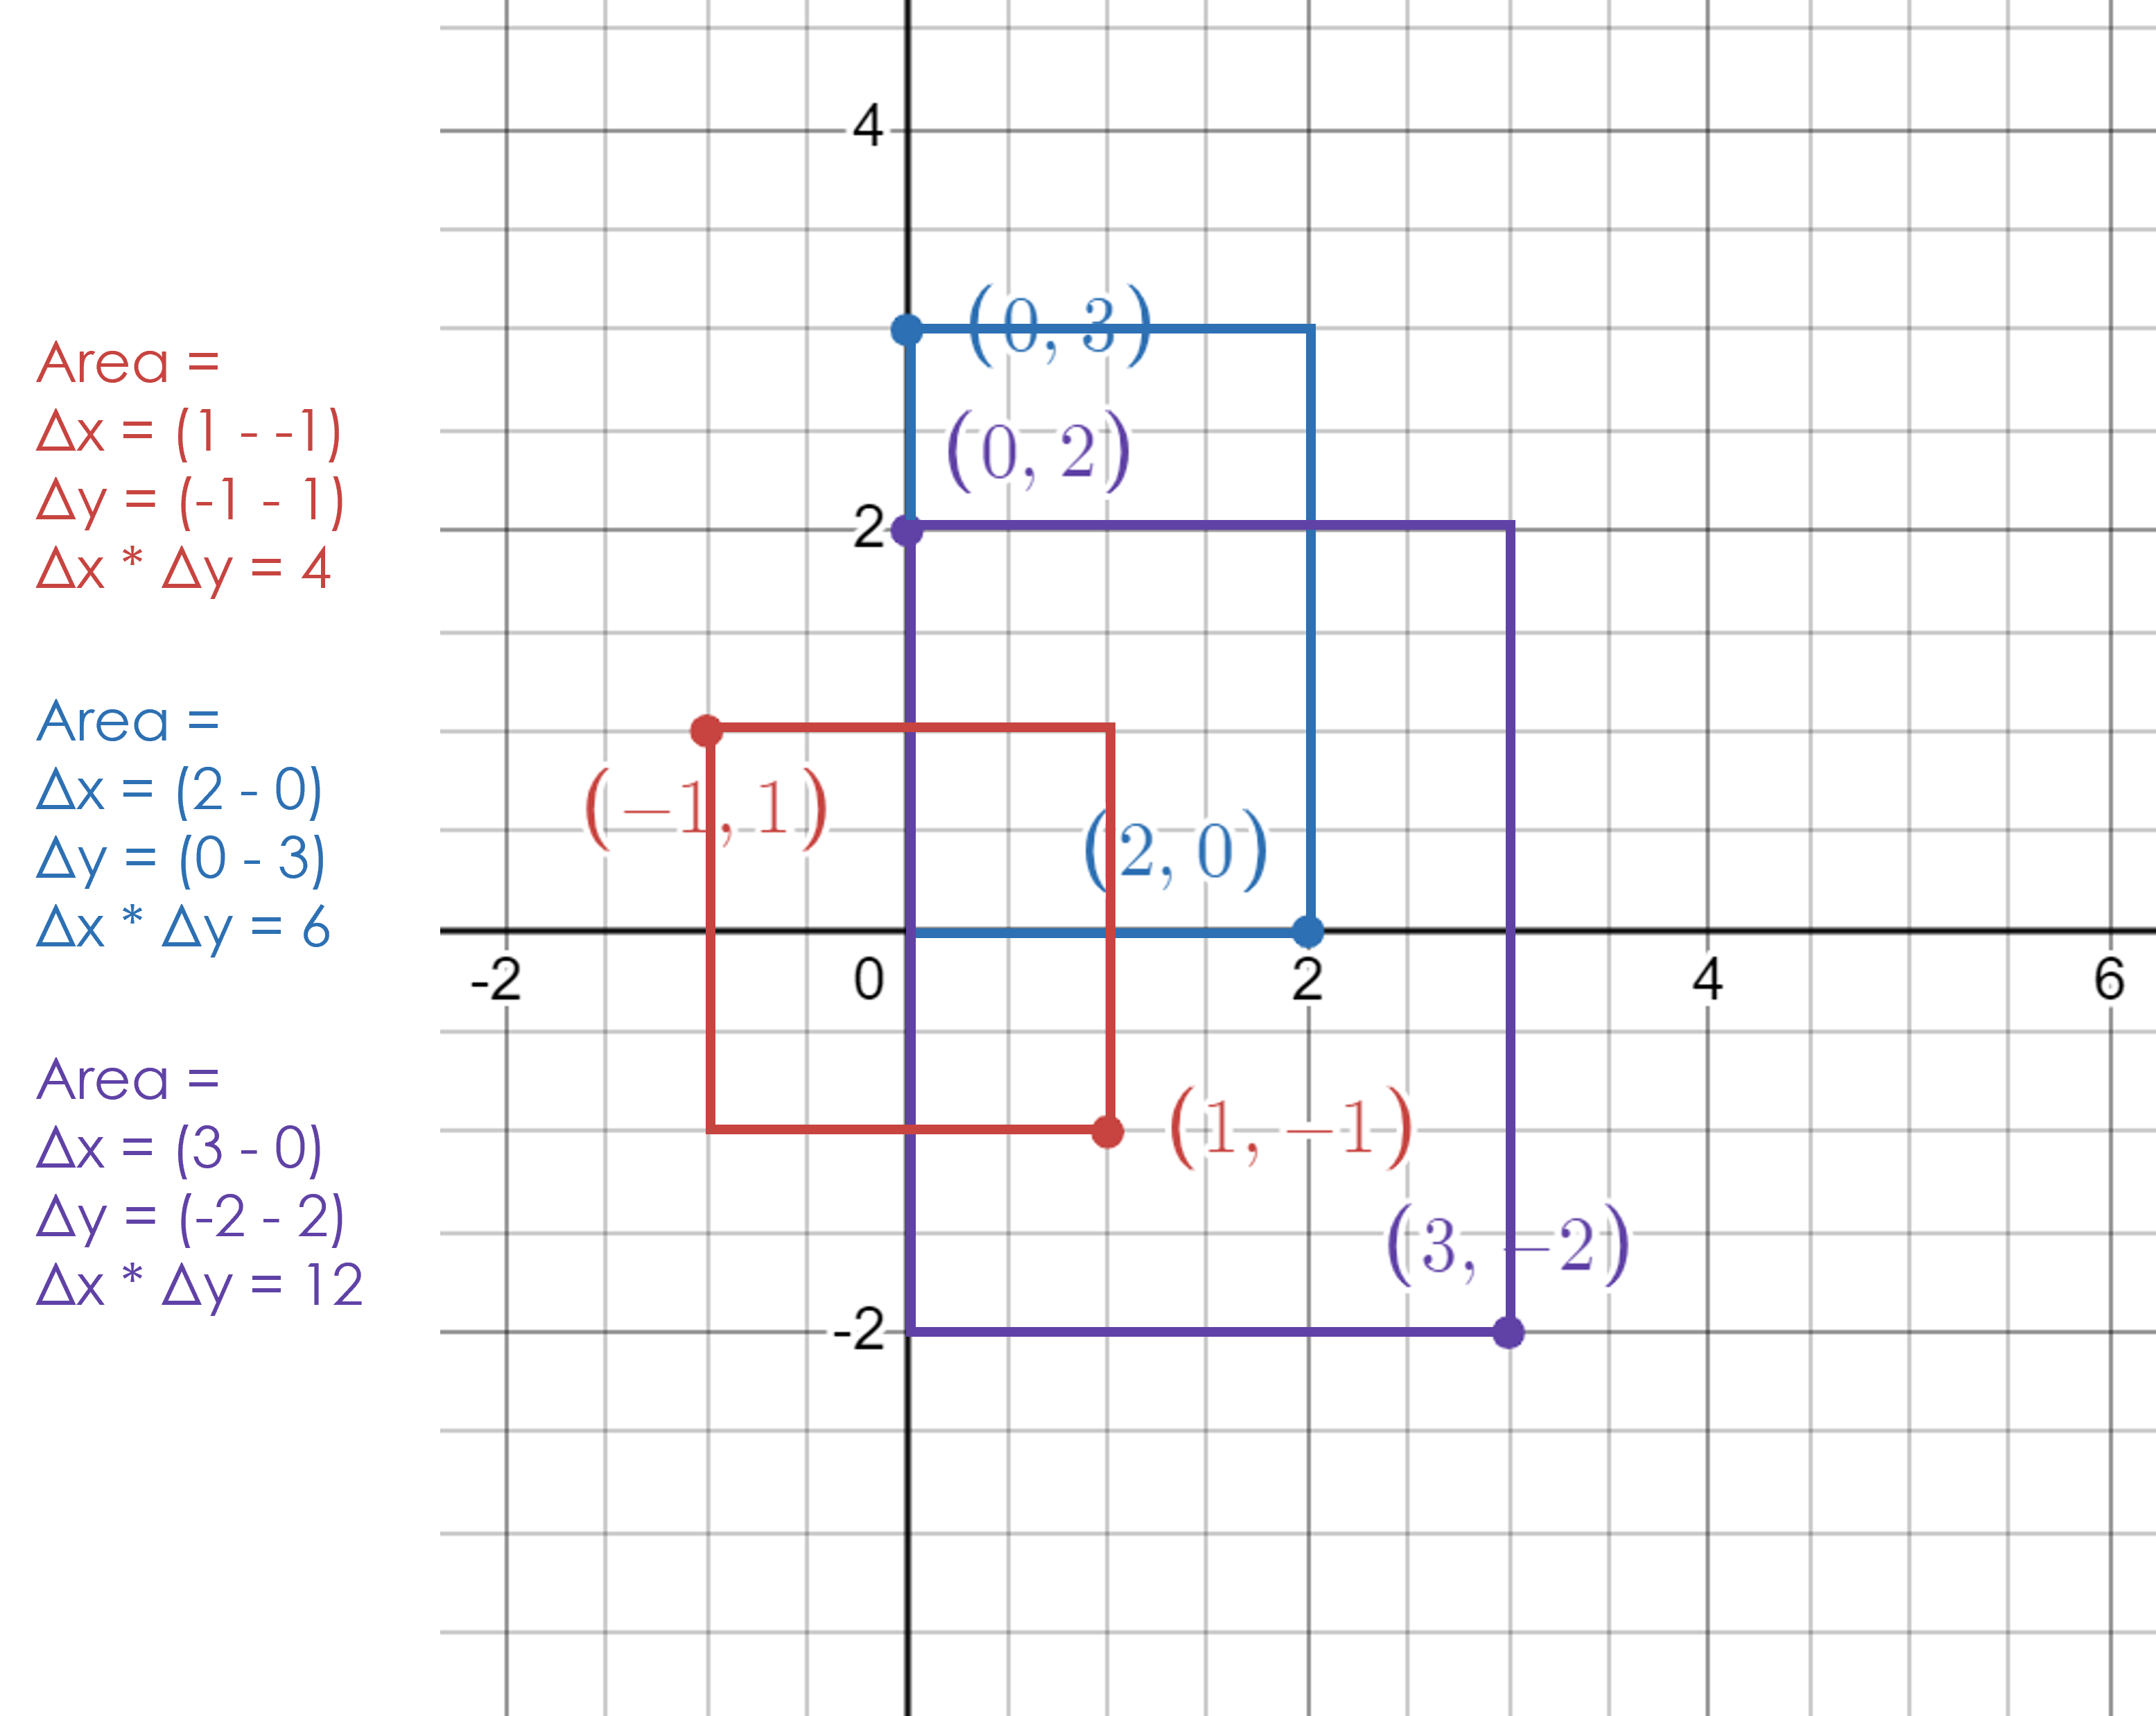

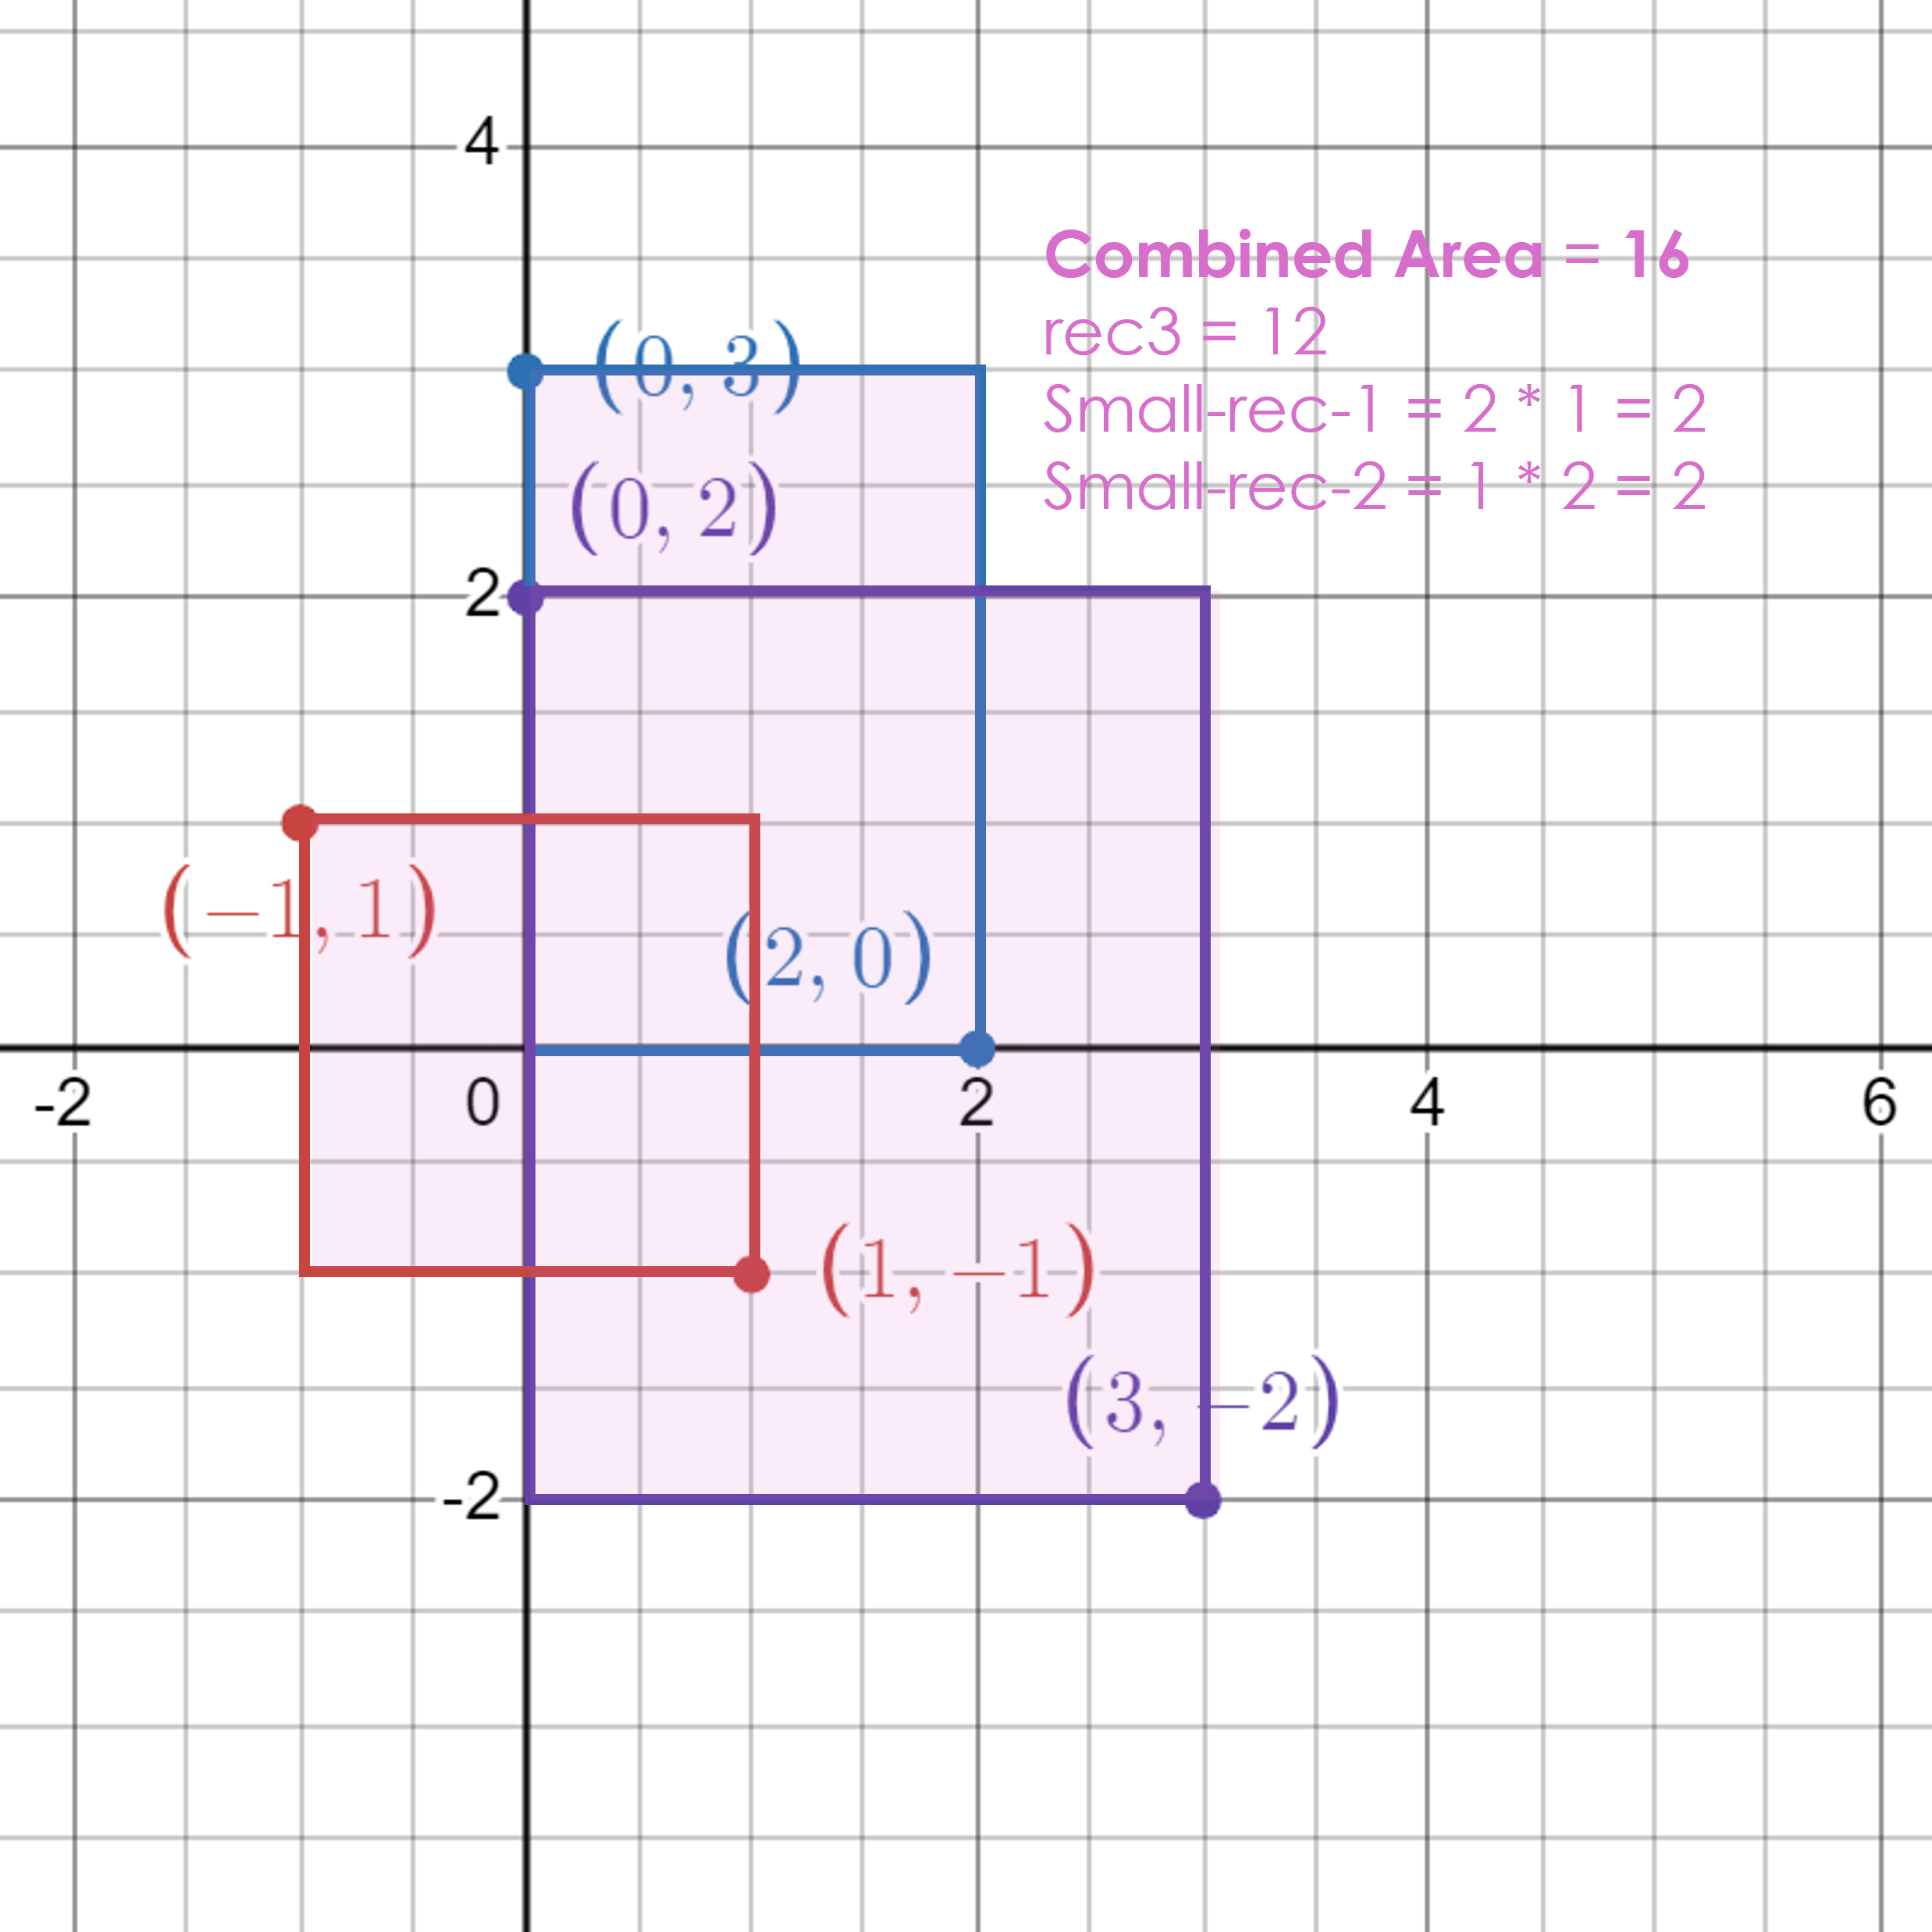